<a href="https://colab.research.google.com/github/samuel0922/my_ex/blob/main/%5BEX05%5DImageDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
**[ EX05 ] Image Detection - 가위 바위 보**
---
### 순서 :
* STEP 1. 환경설정<br>
* STEP 2. 데이터 준비<br>
* STEP 3. 데이터 전처리<br>
* STEP 4. 딥러닝 네트워크 설계<br>
* SETP 5. 딥러닝 네트워크 학습<br>
* STEP 6. 테스트 및 성능 평가<br>
* STEP 7. 성능 개선<br>
  * Try1. 채널수 변경 
  * Try2. Dense레이어 노드수 변경
  * Try3. Epoch 변경
  * Try4. 학습 데이터 증가 
* STEP 8. 제출 및 루브릭<br>
* SETP 9. 회고<br>

---

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**STEP 1. 환경 설정**

In [2]:
#
# 필요한 모듈 불러오기
#

import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
import os

print(tf.__version__)   # Tensorflow의 버전 확인
print(np.__version__)   # Numpy의 버전 확인

from PIL import Image
import glob

print("PIL 라이브러리 import 완료!")


2.8.0
1.21.6
PIL 라이브러리 import 완료!


---
**STEP 2. Train set 데이터 준비

In [3]:

# 이미지 사이즈 변경 함수 정의

def resize_images(img_path):  # 각 img저장된 디렉토리 경로를 받아서
	images=glob.glob(img_path + "/*.jpg")  # list 형식으로 반환

	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")


In [4]:
#
# train 데이터 준비 : train_rsp110
#

#
# 각 이미지들을 폴더에서 불러서 resize 해 줌
#
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
#mount_path = '/content/drive/MyDrive'
#image_dir_path = mount_path + "/aiffel/rock_scissor_paper/train_rsp100/scissor"

mount_path = '/content/drive/MyDrive'

image_dir_path = mount_path + '/aiffel/rock_scissor_paper/train_rsp110/scissor'
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")


# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서

image_dir_path = mount_path + "/aiffel/rock_scissor_paper/train_rsp110/rock"
resize_images(image_dir_path)

print("바위 이미지 resize 완료!")


# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서

image_dir_path = mount_path + "/aiffel/rock_scissor_paper/train_rsp110/paper"
resize_images(image_dir_path)

print("보 이미지 resize 완료!")



110  images to be resized.
110  images resized.
가위 이미지 resize 완료!
110  images to be resized.
110  images resized.
바위 이미지 resize 완료!
110  images to be resized.
110  images resized.
보 이미지 resize 완료!


In [5]:
# 이미지가 있는 폴더 위치를 받아서 데이터를 읽어줌

def load_data(img_path, number_of_data=330):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3

    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        #print(img_path+'/scissor/*.jpg')
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1


    for file in glob.iglob(img_path+'/rock/*.jpg'):
        #print(img_path+'/rock/*.jpg')
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        #print(img_path+'/paper/*.jpg')
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
     
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = "/content/drive/MyDrive/aiffel/rock_scissor_paper/train_rsp110"

(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 330 입니다.
x_train shape: (330, 28, 28, 3)
y_train shape: (330,)


In [6]:
#
# test 데이터 준비 : test_rsp100
#

#
# 각 이미지들을 폴더에서 불러서 resize 해 줌
#
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
#mount_path = '/content/drive/MyDrive'
#image_dir_path = mount_path + "/aiffel/rock_scissor_paper/test_rsp100/scissor"

mount_path = '/content/drive/MyDrive'

image_dir_path2 = mount_path + '/aiffel/rock_scissor_paper/test_rsp100/scissor'
resize_images(image_dir_path2)

print("가위 이미지 resize 완료!")


# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서

image_dir_path2 = mount_path + "/aiffel/rock_scissor_paper/test_rsp100/rock"
resize_images(image_dir_path2)

print("바위 이미지 resize 완료!")


# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서

image_dir_path2 = mount_path + "/aiffel/rock_scissor_paper/test_rsp100/paper"
resize_images(image_dir_path2)

print("보 이미지 resize 완료!")

100  images to be resized.
100  images resized.
가위 이미지 resize 완료!
100  images to be resized.
100  images resized.
바위 이미지 resize 완료!
100  images to be resized.
100  images resized.
보 이미지 resize 완료!


In [7]:
# 이미지가 있는 폴더 위치를 받아서 데이터를 읽어서 정규화 해 줌 => 각 필셀의 값들을 255/로 나눠줌

def load_data(img_path, number_of_data=330):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3

    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        #print(img_path+'/scissor/*.jpg')
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1


    for file in glob.iglob(img_path+'/rock/*.jpg'):
        #print(img_path+'/rock/*.jpg')
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        #print(img_path+'/paper/*.jpg')
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
     
    print("학습데이터(x_test)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = "/content/drive/MyDrive/aiffel/rock_scissor_paper/test_rsp100"

(x_test, y_test)=load_data(image_dir_path)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

학습데이터(x_test)의 이미지 개수는 300 입니다.
x_test shape: (330, 28, 28, 3)
y_test shape: (330,)


---
** STEP 3. 네트워크 설계**

In [8]:
# 네트워크 설계해 보기 : BaseLIne Model

# 바꿔 볼 수 있는 하이퍼파라미터들
n_channel_1=16
n_channel_2=32
n_dense=32
n_train_epoch=20

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

# 딥러닝 네트워크 확인해 보기
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 32)                2

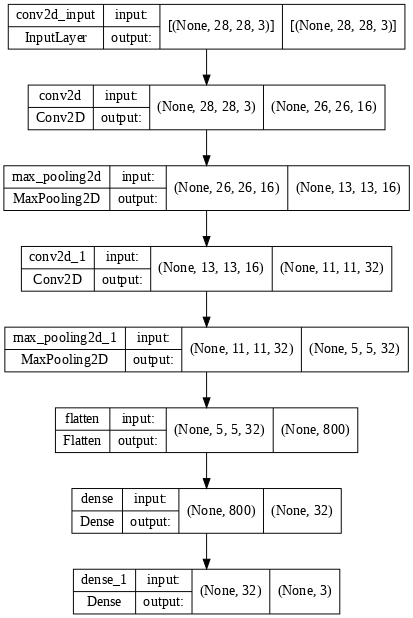

In [9]:
# 네트워크에 대해 Layer의 구성과, 각 Layer에 대한 입출력 shape을 시각화 해 봄

keras.utils.plot_model(model, show_shapes=True, dpi=70)

---
** STEP 4. 딥러닝 네트워크 학습시키기**

In [10]:
# 딥러닝 네트워크 학습
# ephos : 학습 회수 => 20으로 설정

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_norm, y_train, epochs=20)

Epoch 1/20
11/11 [==============================] - 2s 6ms/step - loss: 1.0904 - accuracy: 0.3606
Epoch 2/20
11/11 [==============================] - 0s 4ms/step - loss: 1.0521 - accuracy: 0.5545
Epoch 3/20
11/11 [==============================] - 0s 4ms/step - loss: 0.9899 - accuracy: 0.6576
Epoch 4/20
11/11 [==============================] - 0s 4ms/step - loss: 0.9043 - accuracy: 0.7091
Epoch 5/20
11/11 [==============================] - 0s 4ms/step - loss: 0.7639 - accuracy: 0.8545
Epoch 6/20
11/11 [==============================] - 0s 4ms/step - loss: 0.6074 - accuracy: 0.8727
Epoch 7/20
11/11 [==============================] - 0s 4ms/step - loss: 0.4455 - accuracy: 0.9394
Epoch 8/20
11/11 [==============================] - 0s 4ms/step - loss: 0.3157 - accuracy: 0.9394
Epoch 9/20
11/11 [==============================] - 0s 4ms/step - loss: 0.2216 - accuracy: 0.9697
Epoch 10/20
11/11 [==============================] - 0s 4ms/step - loss: 0.1605 - accuracy: 0.9727
Epoch 11/20
11/11 [

---
**STEP 5. 테스트 및 성능 확인

In [11]:
# 테스트 => evaluate( ) 

test_loss, test_accuracy = model.evaluate(x_test_norm,y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

11/11 - 0s - loss: 3.3390 - accuracy: 0.3030 - 202ms/epoch - 18ms/step
test_loss: 3.338954210281372 
test_accuracy: 0.3030303120613098


In [12]:
def vis(history,name) :
    plt.title(f"{name.upper()}")
    plt.xlabel('epochs')
    plt.ylabel(f"{name.lower()}")
    value = history.history.get(name)
    val_value = history.history.get(f"val_{name}",None)
    epochs = range(1, len(value)+1)
    plt.plot(epochs, value, 'b-', label=f'training {name}')
    if val_value is not None :
        plt.plot(epochs, val_value, 'r:', label=f'validation {name}')
    plt.legend(loc='upper center', bbox_to_anchor=(0.05, 1.2) , fontsize=10 , ncol=1)
    
def plot_history(history) :
    key_value = list(set([i.split("val_")[-1] for i in list(history.history.keys())]))
    plt.figure(figsize=(12, 4))
    for idx , key in enumerate(key_value) :
        plt.subplot(1, len(key_value), idx+1)
        vis(history, key)
    plt.tight_layout()
    plt.show()

In [14]:
# 모델의 추론에 대한 확률분포 확인 => predict()

predicted_result = model.predict(x_test_norm)  # model이 추론한 확률값. 출력층에서 softmax()를 썼기 때문에 확률로 나온 것을 저장함
predicted_labels = np.argmax(predicted_result, axis=1) # 라벨값 => 가장 확률값이 높은 것을 예측값으로 할당해 줌

idx=0  #1번째 x_test를 살펴보자. 
print('model.predict() 결과 : ', predicted_result[idx])  # 가위 0, 바위 1, 보 2에 대한 예측확률값
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_test[idx])

model.predict() 결과 :  [1.5802577e-01 6.6622026e-04 8.4130800e-01]
model이 추론한 가장 가능성이 높은 결과 :  2
실제 데이터의 라벨 :  0


잘못된 예측 건수: 230
예측확률분포: [0.57943827 0.00856808 0.41199368]
라벨: 2, 예측결과: 0


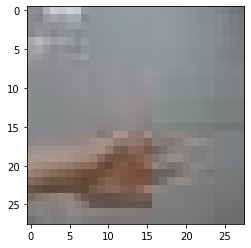

예측확률분포: [0.03262685 0.00567433 0.9616988 ]
라벨: 0, 예측결과: 2


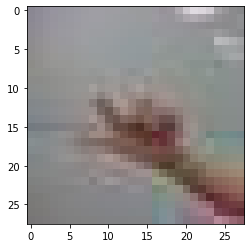

예측확률분포: [0.03022837 0.00705864 0.96271294]
라벨: 0, 예측결과: 2


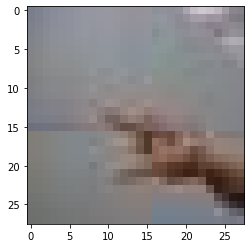

예측확률분포: [0.04872133 0.07698181 0.87429684]
라벨: 0, 예측결과: 2


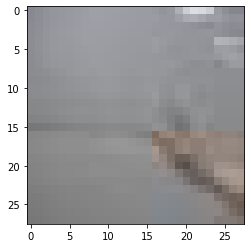

예측확률분포: [0.6954254  0.01030592 0.29426864]
라벨: 1, 예측결과: 0


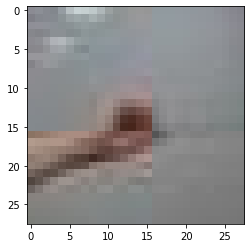

In [15]:
# 모델이 추론한 결과와 실제 라벨 값이 다른 경우 확인

import random

wrong_predict_list=[]  # 예측값과 라벨값이 다른 경우를 담아둘 리스트를 할당해 둠

for i, _ in enumerate(predicted_labels):  # enumerate(배열,start= ) 인수로 넘어온 인자에 대해 인덱스와 요소를 차례로 접근하게 해 줌.  
    # 예측값을 인덱스에 따라 하나씩 뽑아내면서 

    # i번째 test_labels과 y_test이 다른 경우만 모아 봅시다. 
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)  # 다른 경우, 즉 예측이 틀린 경우만 추가해 줌

print("잘못된 예측 건수: " + str(len(wrong_predict_list)))

# wrong_predict_list 에서 랜덤하게 5개만 뽑아봅시다.
samples = random.choices(population=wrong_predict_list, k=5)

for n in samples:  # 랜덤으로 뽑은 5개의 샘플에 대해서 요약해서 보여줌
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n])  # cmap= 컬러맵
    plt.show()

---
## STEP 6. 성능 향상
* 하이퍼 파라미터 변경
> * 이미지특징 수 변경<br> 
> * Dense레이어 뉴런 수 변경<br>
> * 학습 반복 횟수(epoch) 변경<br>
> * 학습 데이터 수 증가<br>
* 네트워크 설계 변경

### Try 1. channel 수 변경 => 

In [17]:
# 바꿔 볼 수 있는 하이퍼파라미터들
n_channel_1=32
n_channel_2=32
n_dense=32
n_train_epoch=10

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])


# 모델 훈련
model.fit(x_train_norm, y_train, epochs=n_train_epoch)

# 테스트 => evaluate( ) 

test_loss, test_accuracy = model.evaluate(x_test_norm,y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 800)               0         
                                                                 
 dense_2 (Dense)             (None, 32)               

### Try 2. Dense layer 뉴런 변경 => 

In [18]:
# 바꿔 볼 수 있는 하이퍼파라미터들
n_channel_1=32
n_channel_2=32
n_dense=64
n_train_epoch=10

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])


# 모델 훈련
model.fit(x_train_norm, y_train, epochs=n_train_epoch)

# 테스트 => evaluate( ) 

test_loss, test_accuracy = model.evaluate(x_test_norm,y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 800)               0         
                                                                 
 dense_4 (Dense)             (None, 64)               

### Try 3. Epoch 변경 => 

In [19]:
# 바꿔 볼 수 있는 하이퍼파라미터들
n_channel_1=32
n_channel_2=32
n_dense=64
n_train_epoch=20

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])


# 모델 훈련
model.fit(x_train_norm, y_train, epochs=n_train_epoch)

# 테스트 => evaluate( ) 

test_loss, test_accuracy = model.evaluate(x_test_norm,y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 800)               0         
                                                                 
 dense_6 (Dense)             (None, 64)               

## Try 4. 훈련 데이터 수 증가

In [20]:
#
# 각 이미지들을 폴더에서 불러서 resize 해 줌
#
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
#mount_path = '/content/drive/MyDrive'
#image_dir_path = mount_path + "/aiffel/rock_scissor_paper/train_rsp100/scissor"

mount_path = '/content/drive/MyDrive'

image_dir_path3 = mount_path + '/aiffel/rock_scissor_paper/train_rsp1371/scissor'
resize_images(image_dir_path3)

print("가위 이미지 resize 완료!")


# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서

image_dir_path3 = mount_path + "/aiffel/rock_scissor_paper/train_rsp1371/rock"
resize_images(image_dir_path3)

print("바위 이미지 resize 완료!")


# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서

image_dir_path3 = mount_path + "/aiffel/rock_scissor_paper/train_rsp1371/paper"
resize_images(image_dir_path3)

print("보 이미지 resize 완료!")


1371  images to be resized.
1371  images resized.
가위 이미지 resize 완료!
1371  images to be resized.
1371  images resized.
바위 이미지 resize 완료!
1371  images to be resized.
1371  images resized.
보 이미지 resize 완료!


In [23]:
# 이미지가 있는 폴더 위치를 받아서 데이터를 읽어서 정규화 해 줌 => 각 필셀의 값들을 255/로 나눠줌

def load_data(img_path, number_of_data=4113):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3

    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        #print(img_path+'/scissor/*.jpg')
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1


    for file in glob.iglob(img_path+'/rock/*.jpg'):
        #print(img_path+'/rock/*.jpg')
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        #print(img_path+'/paper/*.jpg')
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
     
    print("학습데이터(x_test)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path2 = "/content/drive/MyDrive/aiffel/rock_scissor_paper/train_rsp1371"

(x_train2, y_train2)=load_data(image_dir_path2)
x_train2_norm = x_train2/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train2 shape: {}".format(x_train2.shape))
print("y_train2 shape: {}".format(y_train2.shape))

학습데이터(x_test)의 이미지 개수는 4113 입니다.
x_train2 shape: (4113, 28, 28, 3)
y_train2 shape: (4113,)


In [26]:
# 네트워크 설계해 보기 : Try4

# 바꿔 볼 수 있는 하이퍼파라미터들
n_channel_1=32
n_channel_2=32
n_dense=64
n_train_epoch=20

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(3, activation='softmax'))

# 딥러닝 네트워크 확인해 보기
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 26, 26, 32)        896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 5, 5, 32)         0         
 g2D)                                                            
                                                                 
 flatten_6 (Flatten)         (None, 800)               0         
                                                                 
 dropout (Dropout)           (None, 800)              

In [32]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])


# 모델 훈련
history = model.fit(x_train2_norm, y_train2, epochs=n_train_epoch)

# 테스트 => evaluate( ) 

test2_loss, test2_accuracy = model.evaluate(x_test2_norm,y_test2, verbose=2)
print("test_loss: {} ".format(test2_loss))
print("test_accuracy: {}".format(test2_accuracy))

Epoch 1/20
129/129 [==============================] - 1s 4ms/step - loss: 0.1542 - accuracy: 0.9416
Epoch 2/20
129/129 [==============================] - 0s 4ms/step - loss: 0.1438 - accuracy: 0.9441
Epoch 3/20
129/129 [==============================] - 0s 4ms/step - loss: 0.1531 - accuracy: 0.9429
Epoch 4/20
129/129 [==============================] - 0s 4ms/step - loss: 0.1566 - accuracy: 0.9429
Epoch 5/20
129/129 [==============================] - 0s 4ms/step - loss: 0.1374 - accuracy: 0.9521
Epoch 6/20
129/129 [==============================] - 0s 4ms/step - loss: 0.1138 - accuracy: 0.9587
Epoch 7/20
129/129 [==============================] - 0s 4ms/step - loss: 0.1316 - accuracy: 0.9502
Epoch 8/20
129/129 [==============================] - 0s 4ms/step - loss: 0.1286 - accuracy: 0.9548
Epoch 9/20
129/129 [==============================] - 0s 4ms/step - loss: 0.1222 - accuracy: 0.9567
Epoch 10/20
129/129 [==============================] - 0s 4ms/step - loss: 0.1259 - accuracy: 0.9519

## [ 루브릭 ]
##### 1. 이미지 분류기 모델이 성공적으로 만들어졌는가?

* 트레이닝이 정상적으로 수행되었음

##### 2. 오버피팅을 극복하기 위한 적절한 시도가 있었는가?

* 데이터셋의 다양성, 정규화 등의 시도가 적절하였음

##### 3. 분류모델의 test accuracy가 기준 이상 높게 나왔는가?

* 60% 이상 도

## [ 회고 ]

1. 이번 과제에서는 이미지를 분류하기 위한 신경망 모델을 설계하고<br>
 다양한 하이퍼파라미터를 조정하면서 최적의 설정을 찾아내는<br> 
 일련의 과정을 수행하였다.

2. 데이터에 대한 기본적인 전처리를 거쳐 훈련과 테스트에 필요한<br>
데이터셋을 구성하였으며, 세 종류의 데이터셋을 확보해 활용하였다. 

3. Node에서 제시한 Baseline 모델을 학습시키고 평가한 결과<br> 
30.3%의 낮은 정확도를 나타냈기에, 이를 향상시키기 위해 네 가지의<br> 
시도를 적용해 보았다.

  * Try 1. 필터 수 증가를 통해 피처를 증가
    => 32.1% 로 소폭 증가. 무의미함<br>
  * Try 2 Dense 레이어의 노드 수 증가
    => 29.7% 로 소폭 감소.<br>
  * Try 3. Epoch 증가<br>
    => 30.6% 로 Try 2보다 소포 증가했으나,
    Try 1보다는 낮음
  * Try 4. 훈련 데이터수 증가<br>
    => 100% 로 급증하였으나 과적합된 것으로
    판단됨
  * Try 4-1.DropOut을 추가<br>
    => 96.6%로 과적합에서 벗어남

일부 조원들이 과제 진행 과정에서 충분한 정확성이 나오지 않아<br>
다양한 시도를 진행한 것을 들으면서 본인의 과제를 진행하였는데,<br>
본인 과제 처리에 급급하여 세부적인 내용들에 대해 의견을<br>
교환할 시간을 갖지 못하였기에 그 점 아쉽고, 본인 과제가<br>
제대로 된 방향성을 가지고 진행된 것인지 확인이 필요하다<br><br> 
그리고 추가적으로 모델을 다양하게 구성해서 그에 따른 <br>
모델의 예측 결과를 평가, 비교해 보고자 했으나, 이번엔 <br>
시한이 촉박하여 진행하지 못한 점이 아쉽다. <br>
시간이 나서 다시 리뷰할 기회가 생긴다면 모델을 다양하게<br>
구성하면서 그에 따른 정확성의 변화를 확인해 보고<br>
모델 구성에 대한 이해력을 향상시킬 필요가 있겠다.
 